<img src="excelrlogo.png"/>

## Asssignment - 04

####  SIMPLE LINEAR REGRESSION - SALARY HIKE

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns

In [12]:
Salary_Data = pd.read_csv("Salary_Data.csv")
Salary_Data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [13]:
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [15]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


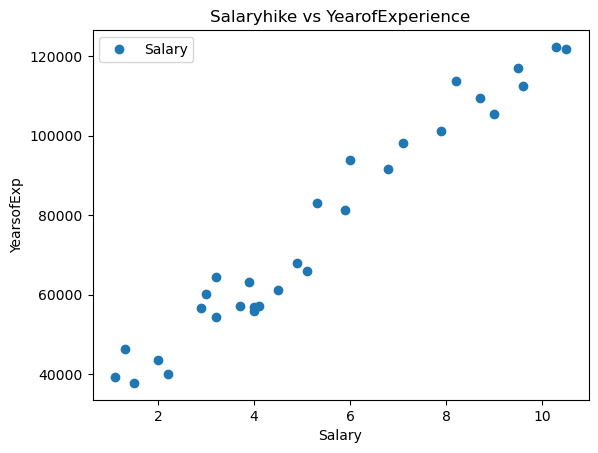

In [16]:
Salary_Data.plot(x='YearsExperience', y='Salary', style='o') 
plt.title('Salaryhike vs YearofExperience')  
plt.xlabel('Salary') 
plt.ylabel('YearsofExp')
plt.show()

In [17]:
corr, _ = pearsonr(Salary_Data['Salary'], Salary_Data['YearsExperience'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.978


In [18]:
corr, _ = spearmanr(Salary_Data['Salary'], Salary_Data['YearsExperience'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.957


C:\Users\gk521\AppData\Local\Temp\ipykernel_12120\3536716584.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary_Data['Salary'])


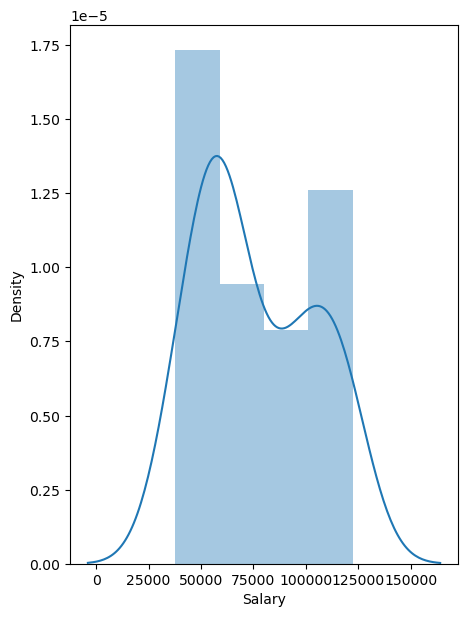

In [21]:
plt.figure(figsize=(5,7))
plt.tight_layout()
sns.distplot(Salary_Data['Salary'])
plt.show() 

C:\Users\gk521\AppData\Local\Temp\ipykernel_12120\3046671598.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary_Data['YearsExperience'])


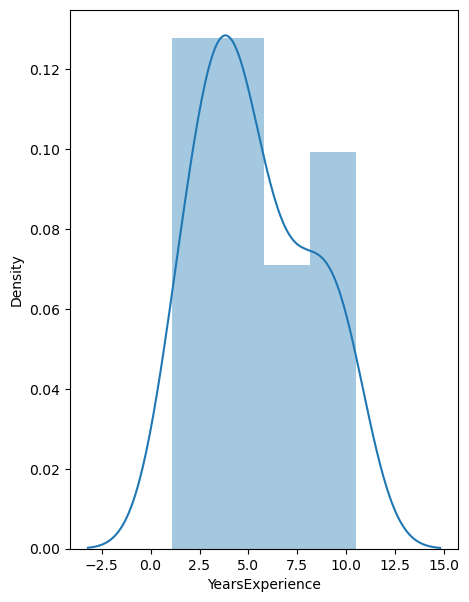

In [22]:
plt.figure(figsize=(5,7))
plt.tight_layout()
sns.distplot(Salary_Data['YearsExperience'])
plt.show()

In [23]:
X = Salary_Data['Salary'].values.reshape(-1,1)
print(X)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [24]:
y = Salary_Data['YearsExperience'].values.reshape(-1,1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [26]:
predict_reg = LinearRegression()

In [27]:
predict_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
print(" Intercept value of Model is " , predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  [-2.4077501]
Coefficient value of Model is  [[0.00010235]]


In [29]:
y_pred = predict_reg.predict(X_test)

In [30]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf

,Actual,Predict
0,9.6,9.120593
1,4.9,4.545795
2,8.2,9.241061
3,5.3,6.096418
4,3.2,4.188282
5,3.7,3.445621


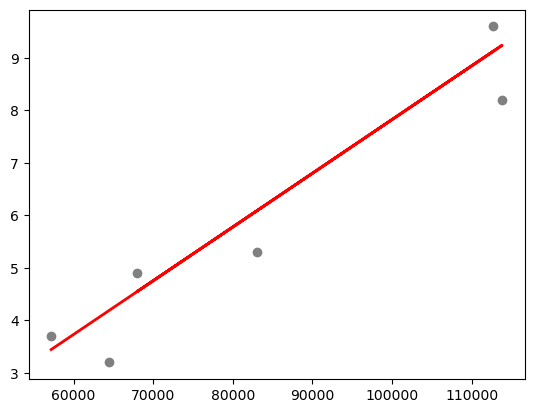

In [31]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6522919548483541
Mean Squared Error: 0.5191320118982409
Root Mean Squared Error: 0.7205081622703804
R^2 Score :           0.9039484379486217


### Conclusion

The code performs a simple linear regression analysis to predict "YearsExperience" based on "Salary." The linear regression model's performance is evaluated using various metrics, and the results are displayed. The code provides insights into the relationship between these two variables and the ability of the linear regression model to make predictions based on the data.

### Thank You!